Optimization terminated successfully.
         Current function value: 0.008878
         Iterations: 146
         Function evaluations: 290


(<AxesSubplot:xlabel='density'>,
 array([9.03083293e-02, 2.51374470e+02, 2.84174970e-01, 1.14265286e-01]))

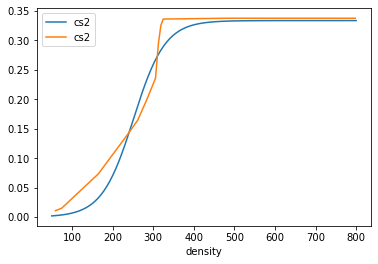

In [1]:
%matplotlib inline
import matplotlib

import pandas as pd
import numpy as np
import astropy.units as units
import astropy.constants as constants
from astropy.cosmology import Planck15
import math

import matplotlib.pyplot as plt
import pylab

from scipy.optimize import fsolve, curve_fit, minimize
from scipy.stats import chisquare
from scipy.special import gamma
import scipy

from parameters import *

H0=1
c=1
R0=1
pi4=math.pi/4.0
sqrt2=math.sqrt(2)

def alphaZ(x):
    alpha = math.pi/4 - math.asin(1/math.sqrt(2)/(1+x))
    return alpha

def z_Out_Of_Alpha(alpha):
    z = 1.0/math.sin(pi4-alpha)/sqrt2-1.0
    return z

def alpha_Out_Of_d_HU(d_HU):
    alpha =  pi4-np.asin((1.0-d_HU)/sqrt2)
    return alpha
    
def z_Out_Of_d_HU(d_HU):
    alpha= alpha_Out_Of_d_HU(d_HU)
    z = z_Out_Of_Alpha(alpha)
    return z

def d_HU_epoch(R0,z):
    alpha = alphaZ(z)
    d_HU=R0*(1- math.cos(alpha)+math.sin(alpha))
    return d_HU

df0=pd.DataFrame(vssquared, columns=["density","cs2"])
# df0.plot(x="density", y="cs2")

def errorf(x):
    error=0
    for x0,y0 in vssquared:
        error+=(f(x0, x)-y0)**2
    return error
def f(x0, x):
    beta=x[0]
    n0=x[1]
    vs0=1/3-1.3E-12
    alpha=x[2]
    return vs0/(1+np.exp(-beta*(x0-n0))**alpha) + 1.3E-12


x0=[0.1,200.0,0.3,0.1]
results=minimize(errorf, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})

x= np.linspace(50,800,200)
df = {}
for x0 in x[:]:
    df[x0]=f(x0, results.x)
    
df1= pd.DataFrame.from_dict(df, orient="index",columns=["cs2"])
df1["density"]=df1.index



def vofsound(x):
    x0=[9.03083293e-02, 2.51374470e+02, 2.84174970e-01, 1.14265286e-01]
    return f(x, x0)

df2=pd.DataFrame()
df2["cs2"]=vofsound(df1.density)

ax=df2.plot()
df0.plot(x="density", y="cs2", ax=ax), results.x



<h1>The segment below is related to the Baryonic Acoustic Oscillations. I wanted to see how my theory would deal with that. This is work in progress</h1>

<br>
<br>

Current Density is related to the speed of light by Energy Conservation:

$$ \rho=\frac{c^2}{0.776 *G *2 \pi^2R_0^2} $$

In [2]:
def densityU(t,u):
    hydrogenatom=1.66E-24*uu.g
    newradius=t*cc.c*u+dbh_radius
    dilution=(dbh_radius/newradius)**(3)
    density=(dbhMev_fm3*dilution.si)
    return density

def atmU(t,u): # fraction of standard atmospherica pressure and number of atoms per cubic meter
    hydrogenatom=1.66E-24*uu.g
    newradius=t*cc.c*u+dbh_radius
    dilution=(dbh_radius/newradius)**(3)
    density=(dbh*dilution.si).si
    # fraction of standard atmospherica pressure
    numatm=(density/hydrogenatom/oneATM_atoms).si
    # number of atoms per cubic meter
    numatm_cubic_meter=(density/hydrogenatom).si
    return numatm,numatm_cubic_meter

def vofsoundU(t,u):
    x=densityU(t,u)
    x0=[9.03083293e-02, 2.51374470e+02, 2.84174970e-01, 1.14265286e-01]
    return np.sqrt(f(x.value, x0))
    

In [3]:
# Blackholium 4D Radius = 121.52 light-seconds= 36E6km
# density and sound velocity of the Blackholium
densityU(0,uu.s), vofsoundU(0,uu.s), BlackholiumRadiusinLightSeconds

(<Quantity 133164.43481855 MeV / fm3>,
 0.5773502691896257,
 <Quantity 121.51863331 3.16881e-08 lyr>)

In [4]:
densityU(0,uu.year), (dbh* cc.c**2).to("MeV/fm**3")

(<Quantity 133164.43481855 MeV / fm3>, <Quantity 133164.43481855 MeV / fm3>)

# Big Bang Radius and Time

In [5]:
densityBigBang=300*uu.MeV/uu.fm**3
BigBangDilution=(dbhMev_fm3/densityBigBang)**(1/3)
BigBangRadius=BigBangDilution*BlackholiumRadiusinLightSeconds
BigBangTime=(((BigBangDilution-1)*BlackholiumRadiusinLightSeconds)/cc.c).to("s")
BigBangRadius, BigBangTime

(<Quantity 926.96899517 3.16881e-08 lyr>, <Quantity 805.45036186 s>)

##### cc.c.si, uu.lyr.si, np.pi, cc.G.si

# Calculation of the energy available for the Many-Bangs

$$ volume(n, \phi) = \frac{ 2*\pi^{(\frac{n-1}{2})}*\int_{0}^{\pi}{sin(x)^{(n - 2)}dx}}{\Gamma(\frac{n-1}{2})}R^3 $$

#  I will consider the volume of the Visible Universe only (1 radian as opposed to pi radians)

In [6]:
from scipy.special import gamma
import scipy.integrate as integrate

def volumeCalc(n,phi,r):
    return 2*np.pi**((n-1)/2)*r**3/gamma((n-1)/2)*integrate.quad(lambda x: np.sin(x)**int(n-2), 0,phi)[0]

In [7]:


# I will consider the volume of the Visible Universe only (1 radian as opposed to pi radians)

r=dbh_radius
#Universe Volume
# volume(4,1 radian)= 3.426543192*r**3
volume=volumeCalc(4,np.pi,dbh_radius).to('m**3')

# Unit cell volume 0.19 femtometer side
cell = 4/3*np.pi*(0.19e-15*uu.m)**3
# Number of Neutrons  = 2.5e+79
NumberOfNeutrons=volume/cell
MassOfVisibleUniverse=NumberOfNeutrons*cc.m_n

# Energy available
energyPerNeutron= 0.78254809*uu.MeV
Energy= NumberOfNeutrons*energyPerNeutron # 4.5E78MeV = 7.2E65 Joules
EnergyPerSupernova=1E51*uu.erg
velocityAvg= np.sqrt(2*Energy.to(uu.joule)/MassOfVisibleUniverse) # 0.04081379 c
BigBangVolume=volume
densityBigBang=(MassOfVisibleUniverse/BigBangVolume).si
BigBang=Energy.to('erg')/EnergyPerSupernova
BigBang, (velocityAvg/cc.c).si, Energy.to("J"), (Energy.si/BigBangVolume).si, volume, volumeCalc(4,1,1)

(<Quantity 4.16478414e+22>,
 <Quantity 0.0408138>,
 <Quantity 4.16478414e+66 J>,
 <Quantity 4.36387214e+33 N / m2>,
 <Quantity 9.54378131e+32 m3>,
 3.4265431911359228)

# So the Big Bang was like 4.2E22 Supernovae explosions of 1E51 Ergs each
# Total Energy 4.2E66 Joules or 9.54E32 Joules/m^3

In [8]:
# Mass converted into energy per meter
m0=(9.83E30*uu.J/cc.c**2).si
# total mass in a meter
m1=densityBigBang*uu.m**3
# Fraction of the total mass into energy
fractionToEnergy=m0/m1
fractionToEnergy, (energyPerNeutron/(cc.m_n*cc.c**2)).si

(<Quantity 1.87614116e-06>, <Quantity 0.00083288>)

$$ \frac{{P\left( {n,{\text{ }}x} \right)}}{{{n_0}{\text{ }}{T_0}{\text{ }}}}{\text{ }} = {\text{ }}\frac{x}{{{T_0}}}\left( {Mp - Mn} \right){\left( {\frac{n}{{{n_0}}}} \right)^2} + \frac{2}{5}[{x^{5/3}} + {\text{ }}{(1 - x)^{5/3}}]{(\frac{{2n}}{{{n_0}}})^{2/3}} - [(2\alpha  - 4{\alpha _L})x(1 - x){\text{ }} + {\alpha _L}]{\left( {\frac{n}{{{n_0}}}} \right)^2} + {\text{ }}\gamma [(2\eta  - 4{\eta _L})x(1 - x){\text{ }} + {\eta _L}]{(\frac{n}{{{n_0}}})^{\gamma  + 1}} $$

$$ \frac{{\varepsilon (n,x)}}{{{T_0}}} = \frac{x}{{{T_0}}}\left( {Mp - Mn} \right)\frac{n}{{{n_0}}} + \frac{3}{5}[{x^{5/3}} + {\text{ }}{(1 - x)^{5/3}}]{(\frac{{2n}}{{{n_0}}})^{2/3}} - [(2\alpha  - 4{\alpha _L})x(1 - x){\text{ }} + {\alpha _L}]\frac{n}{{{n_0}}} + {\text{ }}[(2\eta  - 4{\eta _L})x(1 - x){\text{ }} + {\eta _L}]{(\frac{n}{{{n_0}}})^\gamma } $$

$$ \frac{{\varepsilon (n,0)}}{{{T_0}}} = \frac{3}{5}{(\frac{{2n}}{{{n_0}}})^{2/3}}{\text{ }} + {\alpha _L}\frac{n}{{{n_0}}} + {\text{ }}{\eta _L}{(\frac{n}{{{n_0}}})^\gamma } $$

$$ {T_0}{\text{ }} = {\text{ }}{\left( {\frac{{3{\pi ^{\text{2}}}{n_0}}}{2}} \right)^{\frac{2}{3}}}\frac{{{\hbar ^2}}}{{2m}} $$

(0.0, 1.0)

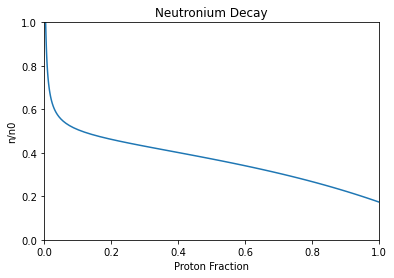

In [9]:
# α = 5.87, η = 3.81

gamma= 4/3
d_units=1/uu.fm**3
n0= (0.16/uu.fm**3).to(d_units) #  neutrons per uu.fm**3
T0=((3*np.pi**2*n0/2)**(2/3)*cc.hbar**2/2/cc.m_p).to("MeV")
n0T0=n0*T0
# alpha= 4.87
# alphaL= 1.4
# nL= 0.875
# neta=3.81


def Pressure(xx, frac,neta, alpha,alphaL,nL,T0, gamma,n0):
    y=xx
    x=frac
    mp=(cc.m_p*cc.c**2).to("MeV")
    mn=(cc.m_n*cc.c**2).to("MeV")
    A0=x*(mn-mp)/T0*y**2
    A=2/5*(x**(5/3)+(1-x)**(5/3))*(2*y)**(5/3)
    B=-((2*alpha-4*alphaL)*x*(1-x)+alphaL)*y**2
    C=gamma*((2*neta-4*nL)*x*(1-x)+nL)*y**(gamma+1)
    return (A0+A+B+C)*n0*T0

def KE(xx, frac,neta,alpha,alphaL,nL,T0,gamma):
    y=xx
    x=frac
    mp=(cc.m_p*cc.c**2).to("MeV")
    mn=(cc.m_n*cc.c**2).to("MeV")
    A0=x*(mn-mp)/T0*y
    A=3/5*2**(2/3)*(x**(5/3)+(1-x)**(5/3))*(y)**(2/3)
    B=-((2*alpha-4*alphaL)*x*(1-x)+alphaL)*y
    C=gamma*((2*neta-4*nL)*x*(1-x)+nL)*y**gamma
    return (A0+A+B+C)*neta*T0

def dKE(xx, frac,neta,alpha,alphaL,nL,T0,gamma):
    y=xx
    x=frac
    mp=(cc.m_p*cc.c**2).to("MeV")
    mn=(cc.m_n*cc.c**2).to("MeV")
    A0=x*(mn-mp)/T0
    A=3/5*2/3*2**(2/3)*(x**(5/3)+(1-x)**(5/3))*(y)**(-1/3)
    B=-((2*alpha-4*alphaL)*x*(1-x)+alphaL)
    C=gamma*((2*neta-4*nL)*x*(1-x)+nL)*y**(gamma-1)*gamma
    return (A0+A+B+C)*neta*T0

def dKEx(y, frac,neta,alpha,alphaL,nL,T0,gamma,n0):
    x=frac
    mp=(cc.m_p*cc.c**2).to("MeV")
    mn=(cc.m_n*cc.c**2).to("MeV")
    A0=(mn-mp)/T0
    A=2**(2/3)*(x**(2/3)-(1-x)**(2/3))*(y)**(2/3)
    B=-(2*alpha-4*alphaL)*(1-2*x)*y
    C=gamma*((2*neta-4*nL)*(1-2*x)+nL)*y**gamma
    return (A0+A+B+C)*neta*T0


def ddKE(xx, frac,neta,alpha,alphaL,nL,T0,gamma):
    y=xx
    x=frac
    mp=(cc.m_p*cc.c**2).to("MeV")
    mn=(cc.m_n*cc.c**2).to("MeV")
    A=3/5*(x**(5/3)+(1-x)**(5/3))*(2*y)**(-4/3)*2/3*(-1/3)
    C=gamma*((2*neta-4*nL)*x*(1-x)+nL)*y**(gamma-2)*gamma*(gamma-1)
    return (A+C)*neta*T0


def findx(y,frac,neta,alpha,alphaL,nL,T0,gamma,n0):
    A=Pressure(y, frac,neta, alpha,alphaL,nL,T0, gamma,n0)/n0/T0
    B=y/T0/(5/3)*(2*y*dKE(y, frac,neta,alpha,alphaL,nL,T0,gamma) + 
                     y**2*ddKE(y, frac,neta,alpha,alphaL,nL,T0,gamma))
    return A-B



def findy(y,frac,neta,alpha,alphaL,nL,T0,gamma,n0):
    mue=15*uu.MeV
    mp=(cc.m_p*cc.c**2).to("MeV")
    mn=(cc.m_n*cc.c**2).to("MeV")
    return dKEx(y, frac,neta, alpha,alphaL,nL,T0, gamma,n0)-mue+(mn-mp)



# xx=np.linspace(0., 1, 100)
# yy00=findy(y=xx, frac=0.0,neta=neta,alpha=alpha,alphaL=alphaL,nL=nL,T0=T0, gamma=gamma,n0=n0)

# plt.plot(xx,yy00) 
# plt.gca().set_xlim(0,(1-vv)/20)
# plt.gca().set_ylim(-2000,0)
# plt.plot(xx,yy05)
# plt.plot(xx,yy10-yy00)



alpha= 5.3
alphaL= 1.2
nL= 0.875
neta=3.81

df={}
x0=3
for frac in np.linspace(0,1,100):
    root = scipy.optimize.root(findy,x0=x0, args = (frac,neta,alpha,alphaL,nL,T0,gamma,n0))
    x0=root.x[0]
    df[frac]=x0
    
df1=pd.DataFrame.from_dict(df, orient="index")
df1["Proton Fraction"]=df1.index
df1.columns=["Proton Fraction", "n/n0"]
ax=df1.plot(x="Proton Fraction", y="n/n0", xlim=[0,1], ylim=[0,1.5], title="Neutronium Decay", legend=False)
ax.set_ylabel("n/n0")
ax.set_ylim([0,1])

In [10]:
frac=0.7
findx(x,frac,neta,alpha,alphaL,nL,T0,gamma,n0)

<Quantity [  -109943.23573429,   -130826.30912694,   -153835.99030011,
             -179026.22740534,   -206448.66259482,   -236152.86390286,
             -268186.52190614,   -302595.61812866,   -339424.57049216,
             -378716.35990809,   -420512.6412193 ,   -464853.84103561,
             -511779.24450303,   -561327.07265849,   -613534.55172058,
             -668437.97542899,   -726072.76135732,   -786473.50197253,
             -849674.01109254,   -915707.36629354,   -984605.94773764,
            -1056401.47382351,  -1131125.03400696,  -1208807.11909157,
            -1289477.64925003,  -1373166.00000362,  -1459901.026359  ,
            -1549711.08527747,  -1642624.05663108,  -1738667.36278234,
            -1837867.98690876,  -1940252.49018047,  -2045847.02788717,
            -2154677.36460097,  -2266768.88845257,  -2382146.62459053,
            -2500835.24788669,  -2622859.09494442,  -2748242.17546147,
            -2877008.18299395,  -3009180.50516421,  -3144782.23335124,
      

In [11]:
densityPreBigBang=310*uu.MeV/uu.fm**3
PreBigBangDilution=(dbhMev_fm3/densityPreBigBang)**(1/3)
PreBigBangRadius=PreBigBangDilution*BlackholiumRadiusinLightSeconds
PreBigBangTime=(((BigBangDilution-1)*BlackholiumRadiusinLightSeconds)/cc.c).to("s")

densityPosBigBang=50*uu.MeV/uu.fm**3
PosBigBangDilution=(dbhMev_fm3/densityPosBigBang)**(1/3)
PosBigBangRadius=PosBigBangDilution*BlackholiumRadiusinLightSeconds
PosBigBangTime=(((PosBigBangDilution-1)*BlackholiumRadiusinLightSeconds)/cc.c).to("s")

CMB_Peak=1.168E-3*uu.eV
z=13.6*3.5*uu.eV/CMB_Peak

radiusAtTransparency=(RR/(z+1)).to(ls)
transparencyTime=(radiusAtTransparency/cc.c).to('yr')

r0=BlackholiumRadiusinLightSeconds
r1=PreBigBangRadius
r2=PosBigBangRadius
r0,r1,r2, radiusAtTransparency, PreBigBangTime,PosBigBangTime, transparencyTime, z
print("r0=",r0,"\n","r1=",r1,"\n","r2=",r2,"\n", "radiusAtTransparency=",radiusAtTransparency)

r0= 121.51863331225826 3.16881e-08 lyr 
 r1= 916.8924471507497 3.16881e-08 lyr 
 r2= 1684.414450040062 3.16881e-08 lyr 
 radiusAtTransparency= 10685830646844.633 3.16881e-08 lyr


In [12]:
dilutionAtTransparency=(radiusAtTransparency/r1)**3
dilutionAtTransparency

<Quantity 1.58295903e+30>

In [13]:
5**(1/3)-1




0.7099759466766968

In [14]:
df

{0.0: 1.3149638543269855,
 0.010101010101010102: 1.2821201766387682,
 0.020202020202020204: 1.2611016056325508,
 0.030303030303030304: 1.2424454579530462,
 0.04040404040404041: 1.224924241859107,
 0.05050505050505051: 1.208028271329668,
 0.06060606060606061: 1.191480729203067,
 0.07070707070707072: 1.175107395275868,
 0.08080808080808081: 1.1587873141288068,
 0.09090909090909091: 1.1424301945214608,
 0.10101010101010102: 1.1259646770699003,
 0.11111111111111112: 1.1093316728172857,
 0.12121212121212122: 1.0924803147172233,
 0.13131313131313133: 1.0753653613814662,
 0.14141414141414144: 1.057945458194463,
 0.15151515151515152: 1.0401819306343816,
 0.16161616161616163: 1.0220379228061331,
 0.17171717171717174: 1.003477769335845,
 0.18181818181818182: 0.9844665318502662,
 0.19191919191919193: 0.9649696572057858,
 0.20202020202020204: 0.9449527310738954,
 0.21212121212121213: 0.9243813115435372,
 0.22222222222222224: 0.903220835396561,
 0.23232323232323235: 0.881436596050753,
 0.2424242424

In [15]:
T0=36.84*uu.MeV
n0=0.16/uu.fm**3
((3/2*np.pi**2*n0)**(2/3)*cc.hbar**2/2/T0).si

<Quantity 1.67404182e-27 kg>

In [16]:
1.674927471E-27 * uu.kg

<Quantity 1.67492747e-27 kg>

In [17]:
df =pd.DataFrame(np.load("./img1/universemap.npy"), columns=["x","y","z","density"])

FileNotFoundError: [Errno 2] No such file or directory: './img1/universemap.npy'

In [ ]:
df.head()

In [ ]:
import glue

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
# df.to_csv("universemap.cvs")
df0 =pd.DataFrame(np.load("./img1/universemap.npy"), columns=["x","y","z","density"])
df0.density=(df.density-df.density.median())/df.density.std()

In [ ]:
df = df0[df0.density<0.1]
df = df[df.density>-0.1]
ax = plt.axes(projection='3d')
ax.scatter3D(df.x, df.y, df.z, c=df.density, cmap='viridis',s=0.1, linewidth=0.5);

In [ ]:
df.to_csv("universemap.cvs")